## Segundo Examen Parcial 

> Damian Elizondo Lizeth Abigail 
>> 5IV1
>> Vision Artificial 

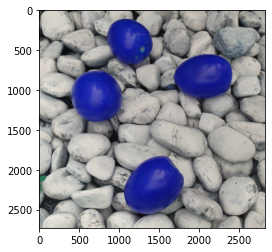

In [1]:
import numpy as np
import cv2 
import urllib
import matplotlib.pyplot as plt
##Primero leemos la imagen 
img = plt.imread('examen.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
img_jitomate = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_jitomate)

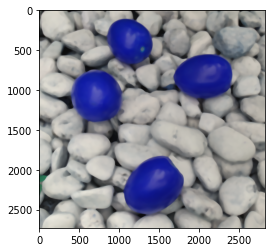

In [15]:
#Aplicamos un blur o un filtro de suevizado nos ayudara a  quitar los "relieves" no deseados 
jitomates_blur = cv2.medianBlur(img_jitomate, 35)
plt.imshow(jitomates_blur)


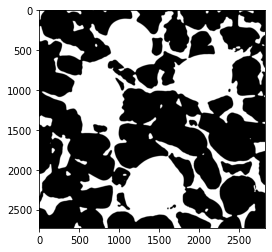

In [16]:
#convertimos en escala a grises 
jitomate_gris = cv2.cvtColor(jitomates_blur, cv2.COLOR_BGR2GRAY)
ret, umbralJ = cv2.threshold(jitomate_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(umbralJ, cmap="gray")

kernel = np.ones((3,3),np.uint8) #Definimos nuestro kerneñl 
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
fondo = cv2.dilate(opening,kernel,iterations=3) #Diferenciamos el fondo de la imagen con las monedas


[[62.547287 61.750385 60.953487 ...  0.        0.        0.      ]
 [61.944187 61.147285 60.350388 ...  0.        0.        0.      ]
 [61.341087 60.544186 59.747288 ...  0.        0.        0.      ]
 ...
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 [ 0.        0.        0.       ...  0.        0.        0.      ]]


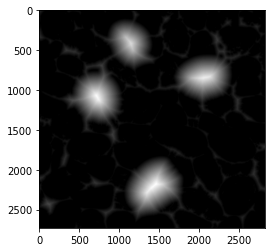

In [14]:
kernel = np.ones((3,3),np.uint8) #Definimos nuestro kerneñl 
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
fondo = cv2.dilate(opening,kernel,iterations=3) #Diferenciamos el fondo de la imagen con las monedas

#Ahora determinamos cual no es parte del fondo 
distancia_transform = cv2.distanceTransform(fondo, cv2.DIST_L2,5)
ret, no_fondo = cv2.threshold(distancia_transform,0.7*distancia_transform.max(),255,0)
ret, no_fondo = cv2.threshold(distancia_transform,0.7*distancia_transform.max(),255,0)
plt.imshow(distancia_transform, cmap="gray")
print(distancia_transform)


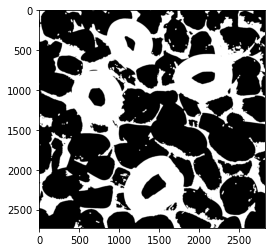

In [6]:
no_fondo = np.uint8(no_fondo)
region_desconocida = cv2.subtract(fondo,no_fondo)#Función para substraer de una matriz a otra. Si el resultado es menor a 0, el valor vuelve a 0 :3
plt.imshow(region_desconocida, cmap="gray")

[[62.547287 61.750385 60.953487 ...  0.        0.        0.      ]
 [61.944187 61.147285 60.350388 ...  0.        0.        0.      ]
 [61.341087 60.544186 59.747288 ...  0.        0.        0.      ]
 ...
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 [ 0.        0.        0.       ...  0.        0.        0.      ]]


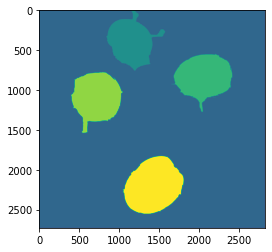

In [13]:
#Aplicamos un blur o un filtro de suevizado nos ayudara a  quitar los "relieves" no deseados 
jitomates_blur = cv2.medianBlur(img_jitomate, 35)
plt.imshow(jitomates_blur)
#convertimos en escala a grises 
jitomate_gris = cv2.cvtColor(jitomates_blur, cv2.COLOR_BGR2GRAY)
ret, umbralJ = cv2.threshold(jitomate_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(umbralJ, cmap="gray")

kernel = np.ones((3,3),np.uint8) #Definimos nuestro kerneñl 
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
fondo = cv2.dilate(opening,kernel,iterations=3) #Diferenciamos el fondo de la imagen con las monedas

#Ahora determinamos cual no es parte del fondo 
distancia_transform = cv2.distanceTransform(fondo, cv2.DIST_L2,5)
ret, no_fondo = cv2.threshold(distancia_transform,0.7*distancia_transform.max(),255,0)
ret, no_fondo = cv2.threshold(distancia_transform,0.7*distancia_transform.max(),255,0)
plt.imshow(distancia_transform, cmap="gray")
print(distancia_transform)

no_fondo = np.uint8(no_fondo)
region_desconocida = cv2.subtract(fondo,no_fondo)#Función para substraer de una matriz a otra. Si el resultado es menor a 0, el valor vuelve a 0 :3
plt.imshow(region_desconocida, cmap="gray")

ret, marcadores = cv2.connectedComponents(no_fondo)
# Marcamos los fondos con 1
marcadores = marcadores+1
# Marcamos las regiones deconocidas con 0
marcadores[region_desconocida==255] = 0
## Fin del preproceso
# Aplicamos el watershed
monedas_watersheed = cv2.watershed(jitomates_blur, marcadores)
plt.imshow(monedas_watersheed)

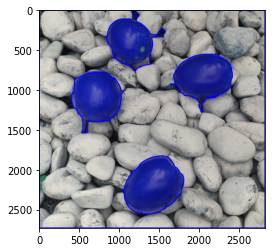

In [18]:
#Por último le podemos dibujar el contorno para diferenciarlo claramente en la imagen inicial
contornos, jerarquía = cv2.findContours(marcadores.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contornos)):
    if jerarquía[0][i][3] == -1:
        cv2.drawContours(img_jitomate, contornos, i, (0, 0, 255), 10)

plt.imshow(img_jitomate) 

## Una vez detectados los objetos 

# Tenemos que detectar las cordenadas de estos mismos

In [3]:
##Primero leemos la imagen 
img = cv2.imread('examen.jpg')
img_jitomate = cv2.resize(img, dsize=(300,300), interpolation=cv2.INTER_CUBIC)

plt.imshow(img_jitomate) 
def on_EVENT_LBUTTONDOWN(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        xy = "%d, %d" % (x, y)
        cv2.circle(img_jitomate, (x, y), 1, (255, 0, 0), thickness = -1)
        cv2.putText(img_jitomate, xy, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.0, (0,0,0), thickness=1)
        cv2.imshow("Jitomates", img_jitomate)

cv2.namedWindow("Jitomates")
cv2.setMouseCallback("Jitomates", on_EVENT_LBUTTONDOWN)

cv2.imshow("Puntos", img_jitomate)
    
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

## Punto C

In [8]:
from math import sqrt
print("Ingresa los valoes del punto 1: ")
x1 = float(input())
y1 = float(input())
print("Ingresa los valoes del punto 2: ")
x2 = float(input())
y2 = float(input())

distancia = sqrt((x2-x1)**2 + (y2-y1)**2)
print("Distancia entre 2 puntos del jitomate 2: ", distancia)

print("Ingresa los valoes del punto 3 (jitomate 4 punto 1): ")
x3 = float(input())
y3 = float(input())
print("Ingresa los valoes del punto 4 (jitomate 4 punto 2): ")
x4 = float(input())
y4 = float(input())

distanciaJ4 = sqrt((x2-x1)**2 + (y2-y1)**2)
print("Distancia entre 2 puntos del jitomate 4: ", distanciaJ4)

Ingresa los valoes del punto 1: 
Ingresa los valoes del punto 2: 
Distancia entre 2 puntos del jitomate 2:  155.2063143045411
Ingresa los valoes del punto 3 (jitomate 4 punto 1): 
Ingresa los valoes del punto 4 (jitomate 4 punto 2): 
Distancia entre 2 puntos del jitomate 4:  155.2063143045411
